In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tif
import glob
from scipy.signal import convolve2d
import cv2
import spam.label
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage.morphology import remove_small_holes
%matplotlib inline
from scipy.ndimage import correlate
from skimage.filters import threshold_otsu

In [2]:
filename = '/home/hasitha/Desktop/packed_img/bin_7-6B.tif'
large_image = tif.imread(filename)

In [6]:
binaries = np.zeros((800,400,400),dtype=np.bool)
#create mask for binaries
mask = np.zeros((400,400)).astype(np.bool)
for i in np.arange(400):
    for j in np.arange(400):
        mask[i,j] = False if (i-200)**2 + (j-200)**2 > 200**2 else True
        
for i in np.arange(800):
    binaries[i] = large_image[i+200,300:700,300:700] * mask

In [13]:
filename = '/home/hasitha/Desktop/packed_img/gray_7-6B.tif'
gray_image = tif.imread(filename)

In [17]:
new_gray_image = np.zeros((800,400,400))
#create mask for gray
mask = np.zeros((400,400))
for i in np.arange(400):
    for j in np.arange(400):
        mask[i,j] = -np.inf if (i-200)**2 + (j-200)**2 > 200**2 else 0
        
for i in np.arange(800):
    new_gray_image[i] = gray_image[i+200,300:700,300:700] + mask
    
new_gray_image[new_gray_image < 0] = 0

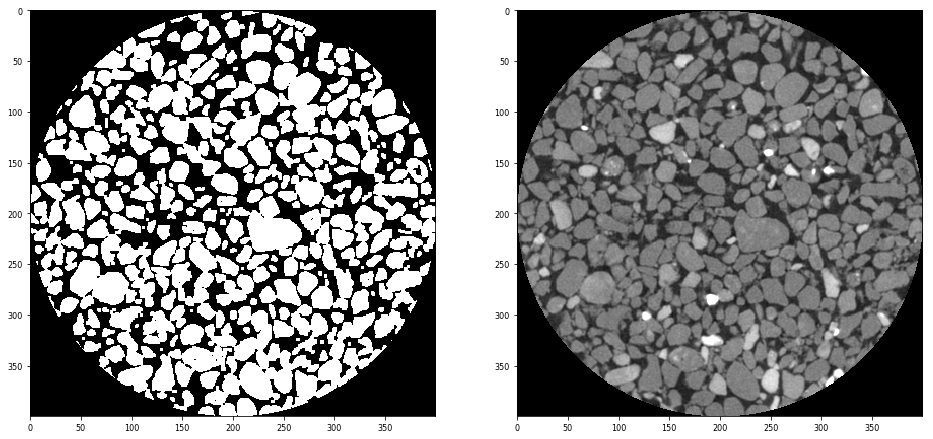

In [19]:
#compare
idx = 0
plt.figure(figsize=(16,16))
plt.subplot(1,2,1)
plt.imshow(binaries[idx],cmap='gray')
plt.subplot(1,2,2)
plt.imshow(new_gray_image[idx],cmap='gray')

In [12]:
#save binaried image
tif.imsave('/home/hasitha/Desktop/packed_img/7-6B_400.tif', binaries)

In [20]:
#save gray image
tif.imsave('/home/hasitha/Desktop/packed_img/gray_7-6B_400.tif', new_gray_image)

In [21]:
#create watershed
water = spam.label.watershed(binaries,verbose=True)

	ITKwatershed.watershed(): Running watershed...done.
	ITKwatershed.watershed(): Collecting labelled image...done.


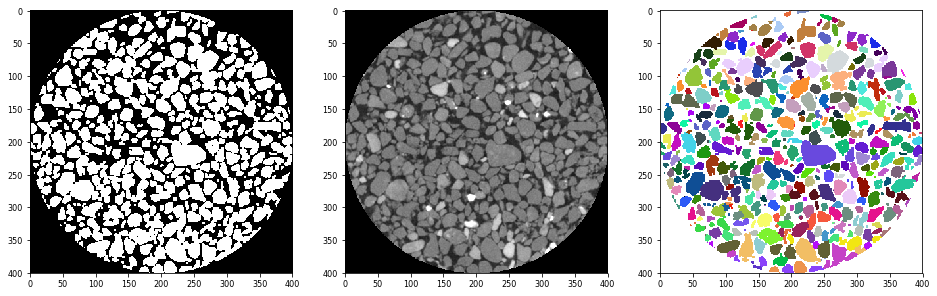

In [23]:
#show comparison again
idx = 0
plt.figure(figsize=(16,16))
plt.subplot(1,3,1)
plt.imshow(binaries[idx],cmap='gray')
plt.subplot(1,3,2)
plt.imshow(new_gray_image[idx],cmap='gray')
plt.subplot(1,3,3)
plt.imshow(water[idx],cmap=spam.label.randomCmap)

In [24]:
#info of watershed
np.max(water)

19292

In [25]:
#save water image
tif.imsave('/home/hasitha/Desktop/packed_img/lab_7-6B_400.tif', water)

In [27]:
np.min(new_gray_image)

0.0